###Μηχανική Μάθηση 
####1η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Αχιλλέας Τσιμιχόδημος

Α.Μ.: 03119140

In [1]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.base import TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1-L7QQEfLWCsqiBClxUlg4yzquf1G_Ga-/view?usp=sharing) και για το testing από [εδώ](https://drive.google.com/file/d/1-6l-NL3wwKGKJpVjxjUrOdFbcnKo-PwW/view?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [84]:
train_data = pd.read_csv('train-val.csv')

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [85]:
test_data = pd.read_csv('test.csv')

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων, 

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [86]:
# 2α

train_labels = len(train_data.axes[1]) - 1
train_samples = len(train_data.axes[0]) - 1


test_labels = len(test_data.axes[1]) - 1
test_samples = len(test_data.axes[0]) - 1


print("The training set has %d labels and %d samples" % (train_labels, train_samples))
print("The test set has %d labels and %d samples" %(test_labels, test_samples))

The training set has 23 labels and 48422 samples
The test set has 22 labels and 9678 samples


In [87]:
# 2β

types_of_labels = []
for i in train_data:
    types_of_labels.append(type(i))

print("The types of labels are:")
print(types_of_labels)

The types of labels are:
[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


In [88]:
# 2γ

labels = []
for i in train_data:
    labels.append(i)

print("The labels are:")
print(labels)

The labels are:
['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [89]:
# 2δ 

categories = train_data.loc[:, 'RainTomorrow'].nunique()
print(categories)

2


In [90]:
# 2ε

samples = train_data.groupby(['RainTomorrow'])['RainTomorrow'].count()
print(samples)

RainTomorrow
0.0    37364
1.0    11059
Name: RainTomorrow, dtype: int64


<AxesSubplot: >

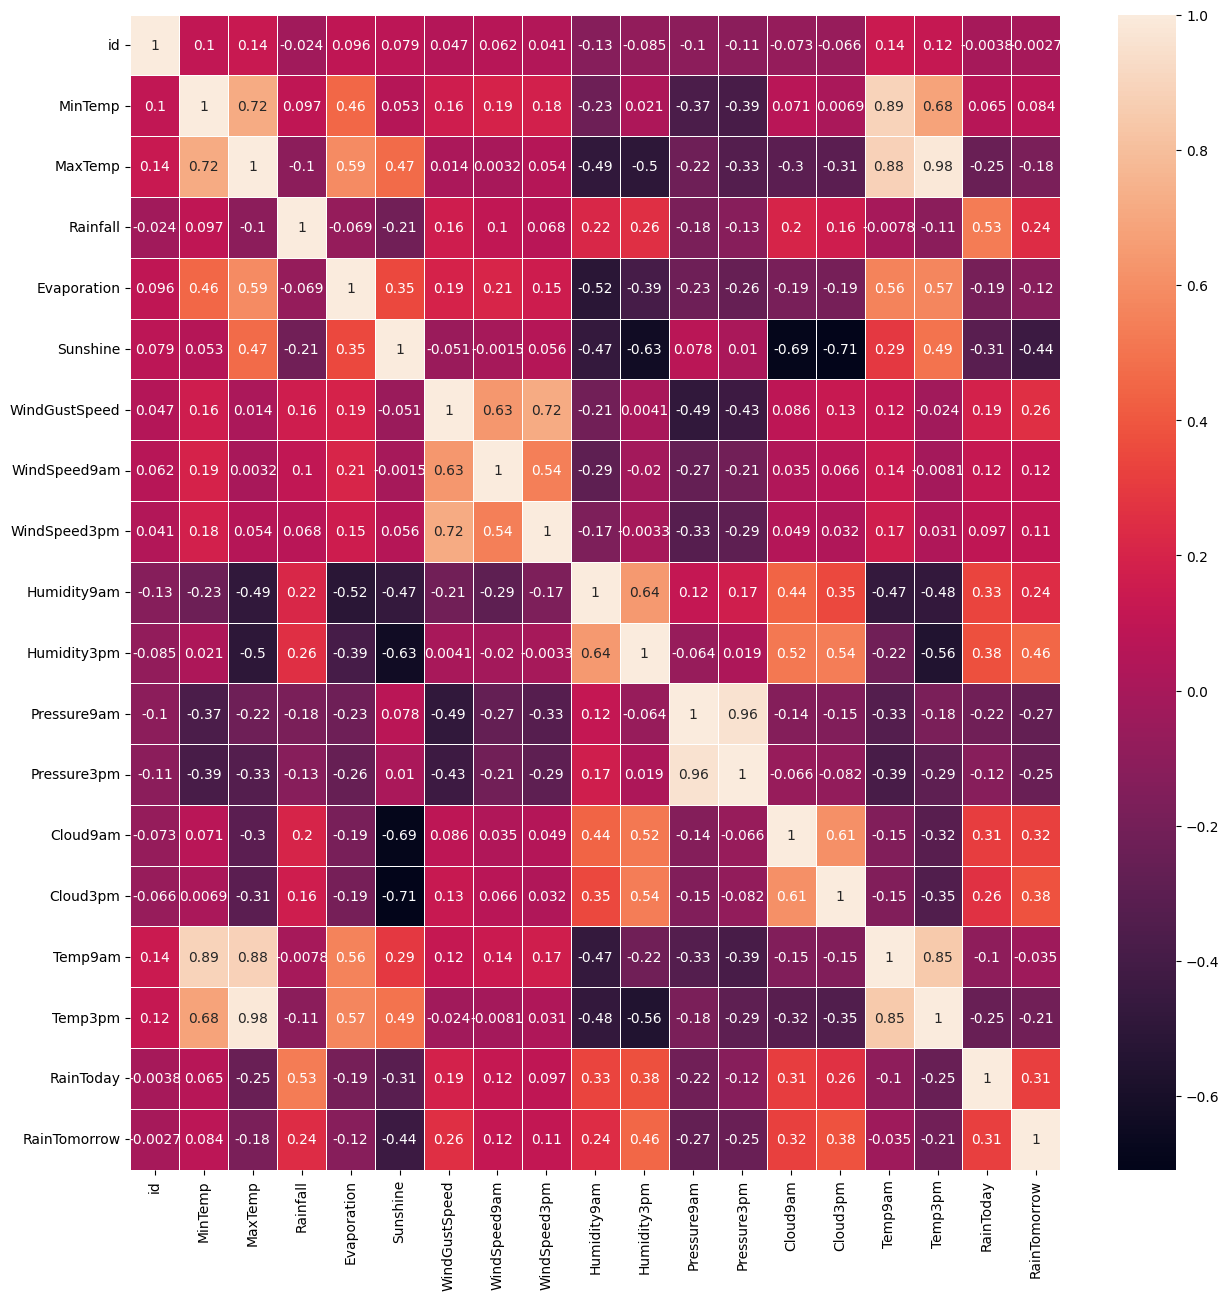

In [91]:
# 2στ
import seaborn as sn
import matplotlib.pyplot as plt

correlation = train_data.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(correlation,annot=True,linewidths=.5, ax=ax)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

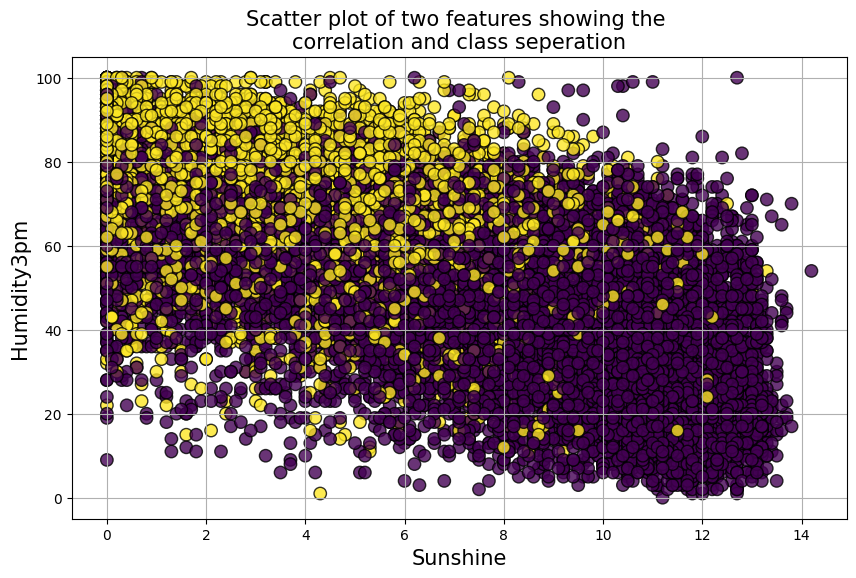

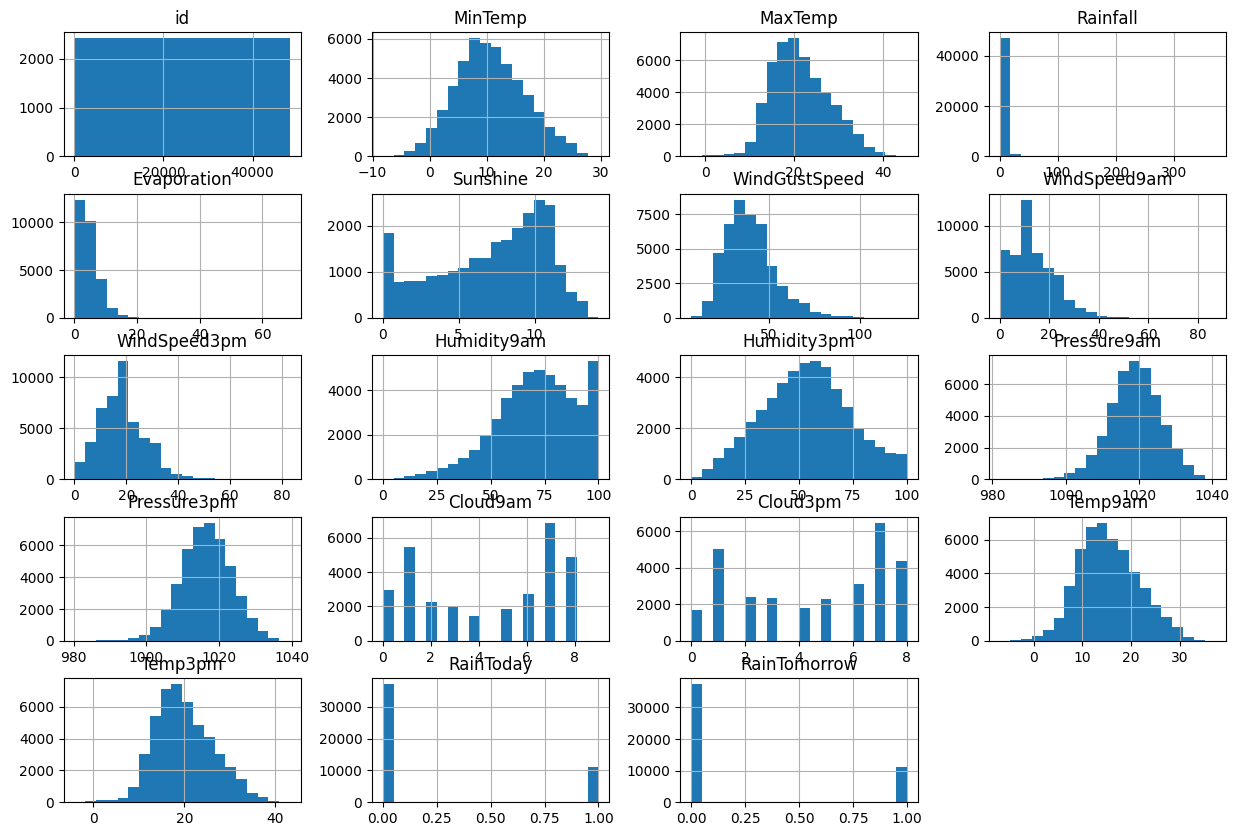

In [92]:
# 2ζ

train_data.info()

plt.figure(figsize=(10,6))
plt.scatter(train_data['Sunshine'],train_data['Humidity3pm'],c=train_data['RainTomorrow'],edgecolors='k',alpha=0.8,s=80)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Sunshine",fontsize=15)
plt.ylabel("Humidity3pm",fontsize=15)
plt.show()

import matplotlib.pyplot as plt
train_data.hist(bins=20, figsize=(15, 10))
plt.show()

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας; 


In [93]:
train_data.drop(['Temp9am'], axis=1, inplace=True)
train_data['Temp3pm'] = (train_data['MaxTemp'] + train_data['Temp3pm'])/2
for i in range(len(train_data['id'])):
    train_data['id'][i] = train_data['Date'][i][5:7]
train_data.drop(['Date'], axis=1, inplace=True)
train_data.rename(columns={"id": "Month"}, inplace=True)

test_data.drop(['Temp9am'], axis=1, inplace=True)
test_data['Temp3pm'] = (test_data['MaxTemp'] + test_data['Temp3pm'])/2
for i in range(len(test_data['id'])):
    test_data['id'][i] = test_data['Date'][i][5:7]
test_data.drop(['Date'], axis=1, inplace=True)
test_data.rename(columns={"id": "Month"}, inplace=True)

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [94]:
train_data.isnull().sum()

Month                0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp3pm            958
RainToday            0
RainTomorrow         0
dtype: int64

In [95]:
numeric_data = train_data.select_dtypes(include='number')
categorical_data = train_data.select_dtypes(exclude='number')


td_numeric = train_data.select_dtypes(include='number')
numeric_features = []
for i in td_numeric:
    numeric_features.append(i)

td_categorical = train_data.select_dtypes(include='object')
categorical_features = []
for i in td_categorical:
    categorical_features.append(i)

numeric_features.pop()

imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [96]:
categorical_transformer = Pipeline(steps=[
    ('imputer', imp_cat),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))]) 

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [97]:
numeric_transformer = Pipeline(steps=[
    ('imputer', imp_num),
    ('scaler', StandardScaler())]) 

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('classifier', classifier)])

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.` 



In [99]:
y = train_data['RainTomorrow']
X = train_data.drop('RainTomorrow', axis=1)

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [100]:
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας: 
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [101]:
# Naive Bayes

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


nbc_model = Pipeline(steps=[('preprocessor', preprocessor), ('to_dense', DenseTransformer()), ('classifier', GaussianNB())])

nbc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('to_dense',
                 <__main__.DenseTransformer object at 0x7f8b099d2f70>),
                ('classifier', GaussianNB())])

In [102]:
# KNeighborsClassifier

knn_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', KNeighborsClassifier())])

In [103]:
# Logistic Regression

lr_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', LogisticRegression())])

In [104]:
# MLP με ένα κρυφό επίπεδο

mlp_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MLPClassifier())])

mlp_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', MLPClassifier())])

In [105]:
# SVC

svc_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC())])

svc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', SVC())])

In [106]:
# Decision Tree 

tree_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

tree_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', DecisionTreeClassifier())])

In [107]:
# Random Forest

rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm', 'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Location',
                                                   'WindGustDir', 'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', RandomForestClassifier())])

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [108]:
# Naive Bayes
nbc_pred = nbc_model.predict(X_test)
nbc_cm = (confusion_matrix(y_test, nbc_pred))
nbc_cmdf = pd.DataFrame(nbc_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('Naive Bayes:')
display(nbc_cmdf)


# KNeighborsClassifier
knn_pred = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cmdf = pd.DataFrame(knn_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('KNeighborsClassifier:')
display(knn_cmdf)


# Logistic Regression
lr_pred = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cmdf = pd.DataFrame(lr_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('Logistic Regression:')
display(lr_cmdf)


# MLP με ένα κρυφό επίπεδο
mlp_pred = mlp_model.predict(X_test)
mlp_cm = confusion_matrix(y_test, mlp_pred)
mlp_cmdf = pd.DataFrame(mlp_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('MLP with 1 hiddden layer:')
display(mlp_cmdf)


# SVC
svm_pred = svc_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cmdf = pd.DataFrame(svm_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('SVC:')
display(svm_cmdf)


# Decision Tree
tree_pred = tree_model.predict(X_test)
tree_cm = confusion_matrix(y_test, tree_pred)
tree_cmdf = pd.DataFrame(tree_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('Decision Tree:')
display(tree_cmdf)


# Random Forest
rf_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cmdf = pd.DataFrame(rf_cm, index=['No Rain Tomorrow','Rain Tomorrow'], columns=['No Rain Tomorrow','Rain Tomorrow'])
print('Random Forest:')
display(rf_cmdf)

Naive Bayes:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,6919,4265
Rain Tomorrow,962,2381


KNeighborsClassifier:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,10415,769
Rain Tomorrow,1639,1704


Logistic Regression:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,10573,611
Rain Tomorrow,1531,1812


MLP with 1 hiddden layer:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,9955,1229
Rain Tomorrow,1256,2087


SVC:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,10706,478
Rain Tomorrow,1531,1812


Decision Tree:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,9597,1587
Rain Tomorrow,1468,1875


Random Forest:


,No Rain Tomorrow,Rain Tomorrow
No Rain Tomorrow,10712,472
Rain Tomorrow,1614,1729



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [109]:
# Naive Bayes
nbc_f1 = f1_score(y_test, nbc_pred)
print('Naive Bayes: %f' % nbc_f1)

# KNeighborsClassifier
knn_f1 = f1_score(y_test, knn_pred)
print('KNeighborsClassifier: %f' % knn_f1)

# Logistic Regression
lr_f1 = f1_score(y_test, lr_pred)
print('Logistic Regression: %f' % lr_f1)

# MLP με ένα κρυφό επίπεδο
mlp_f1 = f1_score(y_test, mlp_pred)
print('MLP with 1 hidden layer: %f' % mlp_f1)

# SVC
svc_f1 = f1_score(y_test, svm_pred)
print('SVC: %f' % svc_f1)

# Decision Tree
tree_f1 = f1_score(y_test, tree_pred)
print('Decision Tree: %f' % tree_f1)

# Random Forest
rf_f1 = f1_score(y_test, rf_pred)
print('Random Forest: %f' % rf_f1)

Naive Bayes: 0.476724
KNeighborsClassifier: 0.585970
Logistic Regression: 0.628512
MLP with 1 hidden layer: 0.626821
SVC: 0.643352
Decision Tree: 0.551065
Random Forest: 0.623737


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


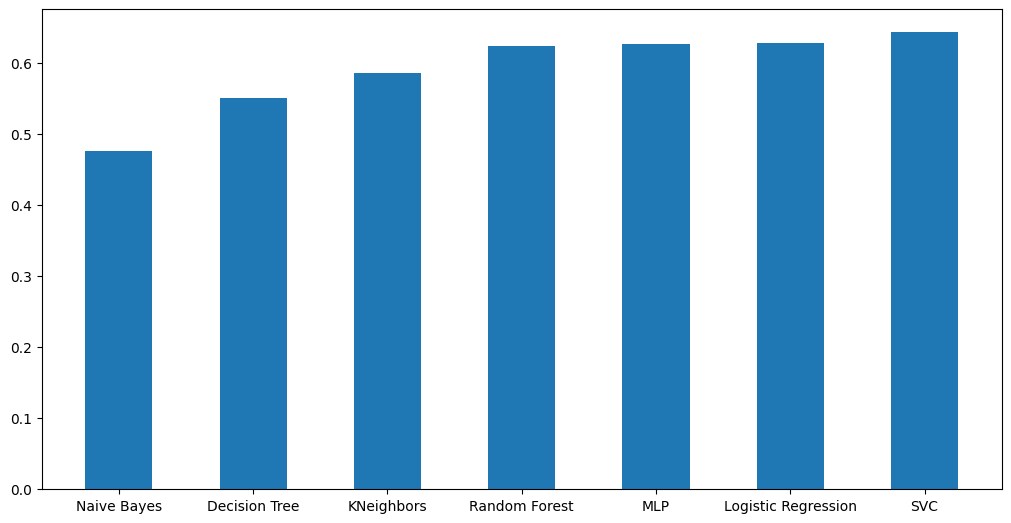

In [110]:
f1_scores = [nbc_f1, knn_f1, lr_f1, mlp_f1, svc_f1, tree_f1, rf_f1]
classifiers = ['Naive Bayes', 'KNeighbors', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree', 'Random Forest']

t = list(zip(f1_scores, classifiers))
t.sort()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar([x[1] for x in t], [x[0] for x in t], width = 0.5)
plt.show()

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [111]:
first_submission = svc_model.predict(test_data)

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [112]:
first_submission = first_submission.astype(int)
ids = np.arange(1, len(first_submission) + 1)

with open('first_file.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(['id', 'RainTomorrow'])
    for i in range(len(first_submission)):
        writer.writerow([ids[i], first_submission[i]])

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

In [115]:
search_space = [(LogisticRegression(),
                 {'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(0, 4, 10)}
                ),
                (RandomForestClassifier(),
                 {'classifier__n_estimators': range(10, 1000, 100),
                  'classifier__max_depth': range(1,10,1)}
                ),
                (SVC(),
                 {'classifier__kernel': ['rbf'], 
                 'classifier__gamma': ['scale', 1e-2, 1e-3], 
                 'classifier__C': [1, 5, 15, 20, 100, 1000]}
                ),
                (KNeighborsClassifier(),
                 {'classifier__n_neighbors': range(15,25),
                 'classifier__metric':['euclidean','manhattan']}
                ),
                (GaussianNB(),
                  {'classifier__var_smoothing': np.logspace(0, -9, num=100)}
                ),
                (DecisionTreeClassifier(),
                  {'classifier__min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
                  'classifier__min_samples_leaf': np.linspace(0.1, 1, 5, endpoint=True),
                  'classifier__max_depth': [2,4,8,12]}
                ),
                (MLPClassifier(),
                  {'classifier__hidden_layer_sizes': [(10,),(30,),(50,)],
                  'classifier__activation': ['tanh', 'relu'],
                  'classifier__solver': ['sgd', 'adam'],
                  'classifier__alpha': [0.0001, 0.05],
                  'classifier__learning_rate': ['constant','adaptive']}
                )
              ]


grids = []
for i in range(7):
  temp = search_space[i]

  if i == 4:
    model = Pipeline(steps=[('preprocessor', preprocessor), ('to_dense', DenseTransformer()), ('classifier', temp[0])])
  else:
    model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', temp[0])])
  grids.append(HalvingGridSearchCV(model, temp[1], cv=5, n_jobs = -1, verbose=0, scoring='f1_macro'))

In [ ]:
for i in range(7):
    grids[i].fit(X_train, y_train)

In [121]:
for i in range(7):
    print(search_space[i][0], ': ', grids[i].best_params_)

LogisticRegression() :  {'classifier__C': 464.15888336127773, 'classifier__penalty': 'l2'}
RandomForestClassifier() :  {'classifier__max_depth': 9, 'classifier__n_estimators': 910}
SVC() :  {'classifier__C': 20, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
KNeighborsClassifier() :  {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 15}
GaussianNB() :  {'classifier__var_smoothing': 0.3511191734215131}
DecisionTreeClassifier() :  {'classifier__max_depth': 8, 'classifier__min_samples_leaf': 0.1, 'classifier__min_samples_split': 0.4}
MLPClassifier() :  {'classifier__activation': 'relu', 'classifier__alpha': 0.05, 'classifier__hidden_layer_sizes': (10,), 'classifier__learning_rate': 'adaptive', 'classifier__solver': 'adam'}


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [117]:
new_preds = []
for i in range(7):
    new_preds.append(grids[i].predict(X_test))


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [118]:
new_f1 = []
for i in range(7):
    new_f1.append(f1_score(y_test, new_preds[i]))
    print(search_space[i][0], ': ', new_f1[i])

LogisticRegression() :  0.6281851274050962
RandomForestClassifier() :  0.5490894695170229
SVC() :  0.6500881834215168
KNeighborsClassifier() :  0.5844649646931015
GaussianNB() :  0.5893501805054151
DecisionTreeClassifier() :  0.5692285340694464
MLPClassifier() :  0.6659008861174925


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


In [119]:
best_scores = []
for i in range(7):
    best_scores.append(grids[i].best_score_)
    print(search_space[i][0], ': ', best_scores[i])

LogisticRegression() :  0.7619142241636235
RandomForestClassifier() :  0.7207824121279041
SVC() :  0.7700556131361956
KNeighborsClassifier() :  0.7350717916984209
GaussianNB() :  0.7340677866372896
DecisionTreeClassifier() :  0.7119856728484788
MLPClassifier() :  0.7770476602694649


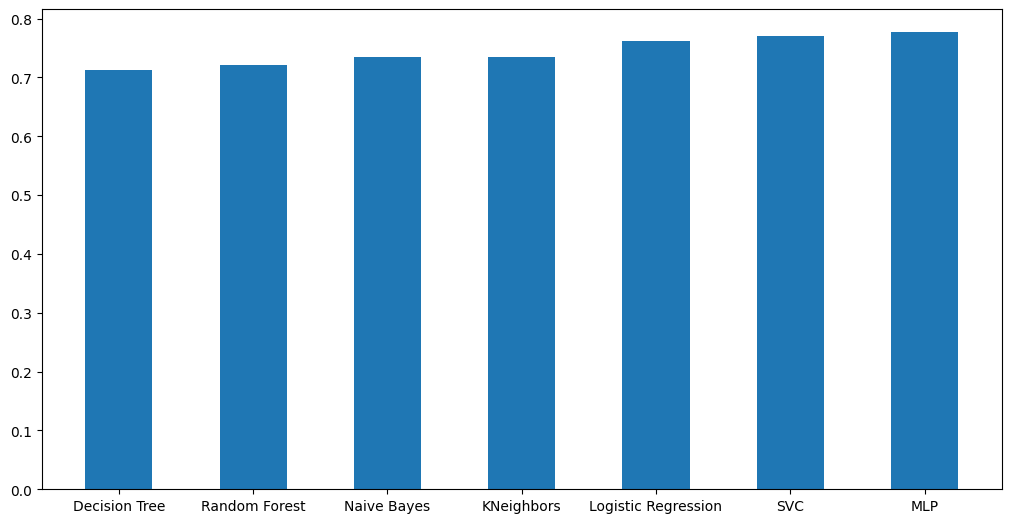

In [120]:
new_classifiers = ['Logistic Regression', 'Random Forest',  'SVC', 'KNeighbors', 'Naive Bayes', 'Decision Tree', 'MLP']
new_t = list(zip(best_scores, new_classifiers))
new_t.sort()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar([x[1] for x in new_t], [x[0] for x in new_t], width = 0.5)
plt.show()

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [123]:
second_submission = grids[6].predict(test_data)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [125]:
second_submission = second_submission.astype(int)
ids = np.arange(1, len(second_submission) + 1)

with open('second_file.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(['id', 'RainTomorrow'])
    for i in range(len(second_submission)):
        writer.writerow([ids[i], second_submission[i]])